# Task 1

### Imports

In [16]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

#### 1) Build colleration matrix and filter results with corellation > 95 or < -.95

In [4]:
df = pd.read_csv('sp500_27270.csv')

# compute correlations
corr = df.corr()
filtered_companies = [company for company in corr['SP500'].keys() if corr['SP500'][company] > 0.95 or corr['SP500'][company] < -0.95]

# select only the most corrleated companies
df_filtered = df.filter(filtered_companies)

print("Total number of companies staisfying the correlation threshold: ", len(filtered_companies))


Total number of companies staisfying the correlation threshold:  72


#### 2) Split dataset to training and testing

In [76]:
TRAINING_PERCENTAGE = 0.8
TESTING_PERCENTAGE = 0.2
# VALIDATION_PERCENTAGE = 0.5 

train, test = train_test_split(df_filtered, test_size=TESTING_PERCENTAGE)

Y_train = list(train['SP500'])
X_train = train.drop(columns=['SP500'])
Y_test = list(test['SP500'])
X_test = test.drop(columns=['SP500'])

X_scaled = preprocessing.scale(df_filtered.drop(columns=['SP500']))
Y_scaled = preprocessing.scale(df_filtered['SP500'])
X_data = np.array(X_scaled)
Y_data = np.array(Y_scaled)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)


print("Training chunk length: ", len(train))
print("Testing chunk length: ", len(test))

Training chunk length:  1008
Testing chunk length:  252


#### 3) Choose scoring metric 

In [19]:
# We chose MSE since it's a regression problem
scoring_metric = "neg_mean_squared_error"

#### 4) Train the neural network with both the sgd and adam optimizer

In [66]:
print("\n-------------------------Adam-----------------------\n")

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nScore: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, max_iter=10000, hidden_layer_sizes=(100,), random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nScore ADAM with constant learning rate of 0.05: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, max_iter=10000, hidden_layer_sizes=(1024,2), random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nAccuracy: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

print("\nConcluding learning rate: ", 0.05, " is best")




-------------------------Adam-----------------------


Score:  0.7981178483209485
MSE:  0.17301200964936214

Score ADAM with constant learning rate of 0.05:  0.9948724423961882
MSE:  0.004394291611467922

Accuracy:  0.9784382414487001
MSE:  0.018478320879328127

Concluding learning rate:  0.05  is best


In [78]:
print("\n-------------------------SGD-----------------------\n")

model = MLPRegressor(early_stopping=True, hidden_layer_sizes=(1024,2), max_iter=10000, random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("R2 Score: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, hidden_layer_sizes=(1024,4,2), random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nScore: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, max_iter=10000, hidden_layer_sizes=(1024,4,2), random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nAccuracy: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

print("\nConcluding SGD is worse in general")



-------------------------SGD-----------------------

R2 Score:  0.982642314424149
MSE:  0.015117479259980556

Score:  0.9863012355135566
MSE:  0.011930783462242257

Accuracy:  0.9863012355135566
MSE:  0.011930783462242257

Concluding SGD is worse in general


In [79]:
param_grid = {'learning_rate' : ['adaptive', 'constant'],
              'solver': ['sgd', 'adam'],
              'learning_rate_init': [0.05, 0.001],
              'hidden_layer_sizes': [(1024, 2), (1024, 4, 2)]
             }


print("\nUsing grid search to find the best params: \n")
gs = GridSearchCV(model, param_grid=param_grid, verbose=20, scoring=scoring_metric)
gs.fit(X_train, Y_train)
print(gs.best_params_)
score = gs.score(X_test, Y_test)
print("Score: ", score)




Using grid search to find the best params: 

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-0.17304041509987145, total=   0.6s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-0.12592144605551708, total=   0.9s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-0.1267950534076021, total=   2.4s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-1.0625435409581026, total=   0.1s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-1.0641840218891927, total=   0.2s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-0.9535758676494582, total=   0.1s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-0.041181468065811584, total=   6.4s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.8s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-0.030292695190928396, total=   6.6s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.5s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-0.033249384266852866, total=   5.9s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.3s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-0.2961572096760093, total=   7.3s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   30.7s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-1.091204299296706, total=   4.3s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   35.0s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-0.8121199715052283, total=   1.7s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   36.7s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-0.17304041509987145, total=   0.2s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   36.9s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-0.13673649050763834, total=   0.4s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=sgd 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-0.35974647870140525, total=   0.1s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   37.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   37.4s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=adam, score=-1.0625435409581026, total=   0.1s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   37.5s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=adam, score=-1.0641840218891927, total=   0.2s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=adam 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.05, solver=adam, score=-0.9535758676494582, total=   0.1s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   37.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   37.9s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=sgd, score=-0.04277170521820366, total=   6.4s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   44.3s remaining:    0.0s


[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=sgd, score=-0.03151151801311758, total=   6.6s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=sgd 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=sgd, score=-0.033249384266852866, total=   6.0s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=adam, score=-0.2961572096760093, total=   8.1s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=adam, score=-1.091204299296706, total=   4.9s
[CV] hidden_layer_sizes=(1024, 2), learning_rate=constant, learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(1024, 2), learning_rate

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.4min finished


{'hidden_layer_sizes': (1024, 4, 2), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
Score:  -0.003033654010781954


In [68]:
print("Finally using best params\n")

model = MLPRegressor(early_stopping=True, hidden_layer_sizes=(100,), random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nAccuracy: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

Finally using best params


Accuracy:  0.9948724423961882
MSE:  0.004394291611467922


#### 5) Indicate which regularization technique you use to avoid overfitting.

We used early stopping to stop the the training when the validation error stops decreasing or the change is slow. Not stop might cause the validation error to increase.

#### 6) Which optimizer performs better in this task? Why?

In [71]:
cross_score = cross_val_score(model, X_test, Y_test, scoring=scoring_metric)
print("Validation score: ", cross_score)

Validation score:  [-0.0456431  -0.03811817 -0.03474598]


In [72]:
cross_score.mean()

-0.03950241972495707

Adam is the best optimizer because that's what the GridSearch tells us. overall, it has lowest training error/loss

#### 7) Plotting predicted vs actual Y values

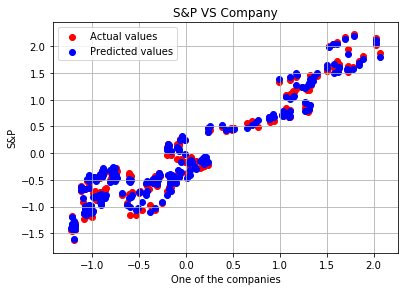

In [73]:
fig = plt.figure()
ax = fig.add_axes([1,0.1,0.8,0.8])
ax.scatter(X_test[:,1], Y_test, c='r', label='Actual values')
ax.scatter(X_test[:,1], y_predictions, c='b', label='Predicted values')

ax.grid()
ax.legend(loc='best')
ax.set_xlabel('One of the companies')
ax.set_ylabel('S&P')
ax.set_title('S&P VS Company')

plt.show()

#### 8) Comment on the points where the prediction and true values mismatch most

# Task 2

#### 1) get most correlated company

In [97]:
max_corr = -100
max_company = ''

for i in corr['SP500'].keys():
    if corr['SP500'][i] > max_corr and i != 'SP500':
        max_corr = corr['SP500'][i]
        max_company = i
        
        
print(max_company)
print(max_corr)

max_company_data = df[max_company]
# print(max_company_data)

APH
0.9883608178608217


#### 2) prepare input and output data set of days using shifting

In [98]:
# print(type(max_company_data))
# print(max_company_data)
# print(max_company_data.shift(-1))
# print(len(max_company_data))

X_data = []
Y_data = []

for iter in range(len(max_company_data) - 9):
    # get first 5 days for input
    X_data.append(list(max_company_data)[:5])
    # get following for days for output
    Y_data.append(list(max_company_data)[5:9])
    # shift data upwards by one step
    max_company_data = max_company_data.shift(-1)
    
# print(X_data)
    


#### 3) split dataset into test and train

In [99]:
TRAINING_PERCENTAGE = 0.8
TESTING_PERCENTAGE = 0.2
# VALIDATION_PERCENTAGE = 0.5 

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_filtered, test_size=TESTING_PERCENTAGE)
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)

print("Training chunk length: ", len(X_train))
print("Testing chunk length: ", len(X_test))
# print(X_train)

Training chunk length:  1000
Testing chunk length:  251


#### 4) Create model and fit 

In [101]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(early_stopping=True, random_state=1)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("Score: ", score)

Score:  0.9774507618739682


In [92]:
# We chose MSE since it's a regression problem
scoring_metric = "neg_mean_squared_error"

In [86]:
param_grid = {'learning_rate' : ['adaptive', 'constant'],
              'solver': ['sgd', 'adam'],
              'learning_rate_init': [0.05, 0.001],
              'hidden_layer_sizes': [(256, 512), (100,2)]
             }


gs = GridSearchCV(model, param_grid=param_grid, verbose=20, scoring=scoring_metric)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-1.3728370547139015e+78, total=   0.7s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-2.4588589361005035e+78, total=   0.7s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-1.3090552081676334e+78, total=   0.7s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-74.37230009366763, total=   0.2s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-2.3680388640576036, total=   0.3s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-20.231632366588805, total=   0.3s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.9s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-1.2964083680420716e+64, total=   0.4s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.3s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-6.490847989578255e+64, total=   0.4s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.6s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-1.4630184592920764e+64, total=   0.4s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-104.42286746104656, total=   0.1s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.2s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-104.89625619405886, total=   0.1s
[CV] hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-99.752934516926, total=   0.1s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.4s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-1.8535986807075064e+82, total=   0.2s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.7s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-3.3199407492342005e+82, total=   0.2s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=sgd 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    4.9s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-1.7674807061049673e+82, total=   0.2s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.2s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=adam, score=-74.37230009366763, total=   0.3s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=adam 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.4s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=adam, score=-2.3680388640576036, total=   0.3s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=adam 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.05, solver=adam, score=-20.231632366588805, total=   0.2s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.9s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=sgd, score=-1.2964083680420716e+64, total=   0.1s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=sgd 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=sgd, score=-6.490847989578255e+64, total=   0.1s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=sgd 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=sgd, score=-1.4630184592920764e+64, total=   0.1s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    6.0s remaining:    0.0s


[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=adam, score=-104.42286746104656, total=   0.1s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=adam, score=-104.89625619405886, total=   0.2s
[CV] hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(256, 512), learning_rate=constant, learning_rate_init=0.001, solver=adam, score=-99.752934516926, total=   0.1s
[CV] hidden_layer_sizes=(100, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 
[CV]  hidden_layer_sizes=(100, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-8022023178272347.0, total=   0.1s
[CV] hidden_layer_sizes=(100, 2), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd 
[CV]  hidden_layer_sizes=(100, 2), learning_rate=adapti

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   10.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': ['adaptive', 'constant'], 'solver': ['sgd', 'adam'], 'learning_rate_init': [0.05, 0.001], 'hidden_layer_sizes': [(256, 512), (100, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=20)

#### Get best params

In [88]:
print(gs.best_params_)
score = gs.score(X_test, y_test)
print("Score: ", score)

{'hidden_layer_sizes': (100, 2), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
Score:  -1.8329937132496845


#### 5) Evaluate model with grid search best params

In [102]:
model = MLPRegressor(early_stopping=True, random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam', hidden_layer_sizes=(100,2))

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("Score: ", score)

Score:  0.9950035098684409


In [104]:
y_predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("\nScore: ", score)
MSE = mean_squared_error(y_test, y_predictions)
print("MSE: ", MSE)


Score:  0.9950035098684409
MSE:  1.27879135757282


#### Try 3 instances

In [108]:
three_instances_x = X_test[:3]
three_instances_y = y_test[:3]
print(three_instances_x)
print(three_instances_y)

three_predictions_y = model.predict(three_instances_x)
print(three_predictions_y)

[[89.0583, 87.4422, 88.8389, 88.4997, 88.3201], [49.6677, 49.6485, 49.4751, 50.1495, 50.5349], [61.6651, 61.8222, 62.6177, 62.981, 63.7372]]
[[88.79899999999999, 88.9187, 88.38, 88.1904], [50.68899999999999, 51.0455, 51.6718, 51.007], [64.5033, 63.2658, 62.8927, 63.3444]]
[[89.27535477 88.86841857 87.83095623 89.1036805 ]
 [50.14820019 50.08705092 50.21327089 50.13115274]
 [62.99486717 62.82018525 62.56433197 62.92705091]]


#### Display 3 days

In [118]:
for idx, instance in enumerate(three_predictions_y):
    print("Instance", (str(idx+1)), ":\n")
    for idx2, day in enumerate(instance):
        print("Day ", (str(idx2+1)), ":")
        print("Predicted: ", day, " Actual: ", three_instances_y[idx][idx2])
    print("\n\n")
    

Instance 1 :

Day  1 :
Predicted:  89.27535477071555  Actual:  88.79899999999999
Day  2 :
Predicted:  88.86841856768064  Actual:  88.9187
Day  3 :
Predicted:  87.83095623271429  Actual:  88.38
Day  4 :
Predicted:  89.10368049960985  Actual:  88.1904



Instance 2 :

Day  1 :
Predicted:  50.14820019291545  Actual:  50.68899999999999
Day  2 :
Predicted:  50.087050920971556  Actual:  51.0455
Day  3 :
Predicted:  50.213270893539956  Actual:  51.6718
Day  4 :
Predicted:  50.13115274404359  Actual:  51.007



Instance 3 :

Day  1 :
Predicted:  62.9948671732027  Actual:  64.5033
Day  2 :
Predicted:  62.82018525116464  Actual:  63.2658
Day  3 :
Predicted:  62.564331974679725  Actual:  62.8927
Day  4 :
Predicted:  62.92705090883958  Actual:  63.3444





#### Values are close due to the 99% score of the model

# Task 3

## Some context on the TfidVectorizer and text handing in sklearn

* To represent a review to a neural network, each word has to be expressed as a number. 

* Each word in the review corpus is assigned a unique number. Assume the total number of unique words is feature_count. 

* Each review can then be represented as a vector of length feature_count. 

* Entries in this vector can be either 0 or 1, if the word is present in this review or absent respectively. 

* A more advanced approach will replace the binary numbers above with ratios that emphaise how rare ( and hence meanigful and representative ) the word is across all reviews. For example, a word like "product" will have little use for the neural network in determing whetehr this is a rating-1 or rating-5 review, as this particular word occurs in most reviews, both positive and negative ones. 

* Here we limit the number of feature_count to 40,000 to cut down the training time. 

more info available from 
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

#### Read dataset and clean

In [121]:
import pandas as pd

reviews = pd.read_json('reviews_digital.json', lines=True)


In [122]:
print(reviews.groupby('overall').count()['asin'])
print()
frames = []

for i in range(1,6):
    frames.append(reviews[(reviews['overall'] == i)][:2500])

balanced_data = pd.concat(frames)

print(len(balanced_data))

overall
1     2791
2     3010
3     6789
4    16536
5    35580
Name: asin, dtype: int64

12500


#### Split data

In [123]:
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

TESTING_PERCENTAGE = 0.2

X_data = np.array(balanced_data['reviewText'])

stop_words = set(stopwords.words('english')) 
X_data_new = []
for text in X_data:
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    X_data_new.append(' '.join(filtered_sentence))
  

Y_data = np.array(balanced_data['overall'])


X_train, X_test, y_train, y_test = train_test_split(X_data_new, Y_data, test_size=TESTING_PERCENTAGE)


#### Calculate tfidf scores

In [124]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#You need to define X_train and X_test
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

# print(X_train_transformed)

In [65]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(early_stopping=True, hidden_layer_sizes=(1024,))

model.fit(X_train_transformed, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(1024,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [66]:
print(model.score(X_test_transformed, y_test))

0.6264


In [ ]:
from sklearn import model_selection
# seed = 7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)

# Since this is a classification problem then accuracy can be used
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train_transformed, y_train, cv=3, scoring=scoring, verbose=20)

[CV]  ................................................................


In [70]:
results.mean()
results.std()

0.5972996342489773

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['adam'],
    'activation': ['relu', 'tanh'],
    'hidden_layer_sizes': [(1024, 4, 2), (1024,512,2)],
    'early_stopping': [True]
}

grid_search = GridSearchCV(model, param_grid=param_grid, verbose=20)

grid_search.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam, score=0.6075516719930465, total= 3.4min
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam, score=0.603406357232342, total= 3.7min
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.1min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam, score=0.596112182753537, total= 3.8min
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.0min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam, score=0.5316250894805858, total= 5.0min
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 15.9min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam, score=0.5245523836987167, total= 6.0min
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 21.9min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam, score=0.5238661016922583, total= 4.8min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 26.7min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam, score=0.6270429358833762, total=14.7min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 41.4min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam, score=0.6215238100832715, total=14.5min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 55.9min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 4, 2), solver=adam, score=0.6100948092943153, total=16.4min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 72.3min remaining:    0.0s
/home/ameniawy/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam, score=-3.108016435112382, total=10.0min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(1024, 512, 2), solver=adam 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 82.4min remaining:    0.0s
/home/ameniawy/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


AttributeError: 'MLPRegressor' object has no attribute '_best_coefs'

In [59]:
print(grid_search.best_params_)

{'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (256, 512), 'solver': 'adam'}
